**HOMEWORK 3 QUESTION 2- INDIVIDUAL- SEARANKI@IU.EDU**


**1. Apply PCA to the images from folder 'catsndogs_train'. How many components do you need to preserve 90% of the variance? [3 points]**

We preprocess the images by loading them, resizing them to a standard size, and flattening each image into a vector so that PCA can be applied. It's important because PCA requires a 2D matrix where each row is a data point (image) and each column is a feature (pixel values).

We perform PCA on the flattened images to reduce the dimensionality while attempting to preserve as much of the variance in the data as possible.

In [68]:
from zipfile import ZipFile
import os

zip_file_path = '/content/catsndogs_train.zip'
extraction_directory = '/content/catsndogs_train'

os.makedirs(extraction_directory, exist_ok=True)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
extracted_files[:5], len(extracted_files)


(['cat_211.jpg', 'dog_56.jpg', 'cat_146.jpg', 'dog_206.jpg', 'cat_67.jpg'],
 240)

In [69]:
from PIL import Image
import numpy as np

standard_size = (64, 64)

def preprocess_image(image_path):
    with Image.open(image_path) as img:
        img_resized = img.resize(standard_size)
        img_gray = img_resized.convert('L')
        img_vector = np.array(img_gray).flatten()

    return img_vector

# Preprocess all images
image_data = np.array([preprocess_image(os.path.join(extraction_directory, file)) for file in extracted_files])

image_data.shape


(240, 4096)

In [70]:
from sklearn.decomposition import PCA

image_data = np.array([preprocess_image(os.path.join(extraction_directory, file)) for file in extracted_files])

pca = PCA()
pca.fit(image_data)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_for_90_variance = np.where(cumulative_variance_ratio >= 0.9)[0][0] + 1

print(cumulative_variance_ratio[:10])

print("the number of components required in order to maintain 90% variance is ",components_for_90_variance)


[0.3954945  0.46112209 0.51174616 0.56026609 0.59132214 0.61321378
 0.63137683 0.64932047 0.66540765 0.68044305]
the number of components required in order to maintain 90% variance is  63


In [71]:

np.random.seed(42)
selected_indices = np.random.choice(image_data.shape[0], 10, replace=False)
selected_images = image_data[selected_indices]

transformed_images = pca.transform(selected_images)
reconstructed_images = pca.inverse_transform(transformed_images)

reconstructed_images_reshaped = reconstructed_images.reshape(-1, 64, 64)

(selected_images.reshape(-1, 64, 64), reconstructed_images_reshaped)


(array([[[ 87, 113, 102, ..., 100,  96,  92],
         [105,  97,  94, ..., 122,  96,  78],
         [106,  84,  89, ..., 140, 124,  79],
         ...,
         [ 29,  25,  76, ...,  23,  17,  11],
         [ 26,  19,  73, ...,  21,  16,  11],
         [ 22,  15,  14, ...,  18,  15,  10]],
 
        [[207, 205, 201, ..., 219, 219, 219],
         [207, 204, 200, ..., 218, 217, 217],
         [206, 203, 198, ..., 217, 217, 217],
         ...,
         [100, 102,  97, ..., 199, 208, 207],
         [ 99,  97,  91, ..., 190, 198, 200],
         [ 95,  92,  87, ..., 193, 195, 195]],
 
        [[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]],
 
        ...,
 
        [[ 26,  26,  26, ...,  28,  27,  27],
         [ 26,  26,  26, ...,  28,  27,  27],
         [ 26,

By applying PCA we got number of components needed to preserve 90% of variance as 63.

**2. Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 90% of variance using PCA. [3 points]**

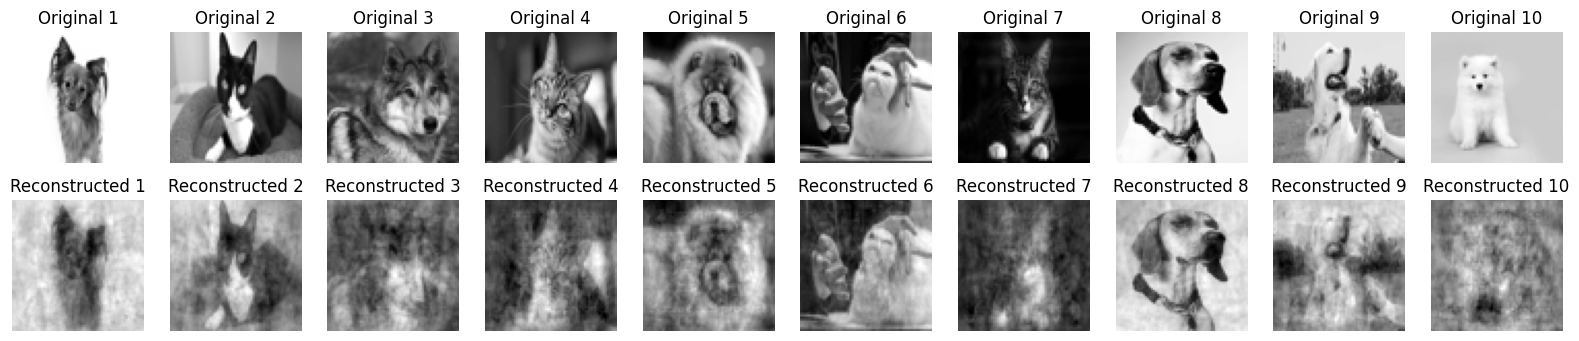

In [72]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from PIL import Image
import os

def load_and_preprocess_image(image_path, size=(64, 64)):
    with Image.open(image_path) as img:
        img = img.resize(size).convert('L')
        img_array = np.array(img, dtype=np.float32).flatten() / 255.0
    return img_array

def plot_images(original_images, reconstructed_images, image_shape=(64, 64)):
    fig, axs = plt.subplots(2, 10, figsize=(20, 4))
    for i in range(10):
        axs[0, i].imshow(original_images[i].reshape(image_shape), cmap='gray')
        axs[0, i].set_title(f"Original {i+1}")
        axs[0, i].axis('off')

        axs[1, i].imshow(reconstructed_images[i].reshape(image_shape), cmap='gray')
        axs[1, i].set_title(f"Reconstructed {i+1}")
        axs[1, i].axis('off')
    plt.show()

dataset_dir = '/content/catsndogs_train'

file_names = os.listdir(dataset_dir)[:100]
images = np.array([load_and_preprocess_image(os.path.join(dataset_dir, f)) for f in file_names])

# Apply PCA and keep 90% of the variance
pca = PCA(n_components=0.90)
pca.fit(images)

# Select 10 random images for demonstration
indices = np.random.choice(range(len(images)), 10, replace=False)
selected_images = images[indices]

transformed_images = pca.transform(selected_images)
reconstructed_images = pca.inverse_transform(transformed_images)

# Plotting original and reconstructed images
plot_images(selected_images, reconstructed_images)


We observe that the reconstructed images are visually similar to the original ones, though they might appear slightly blurred or lose some details. This is due to the dimensionality reduction process, where some information is lost, but the essential features that contribute most to the variance in the dataset are retained. ​

**3A. Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components? [2 points].**

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(image_data)

explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Total explained variance by the first two components: {explained_variance_ratio:.2f}")


Total explained variance by the first two components: 0.46


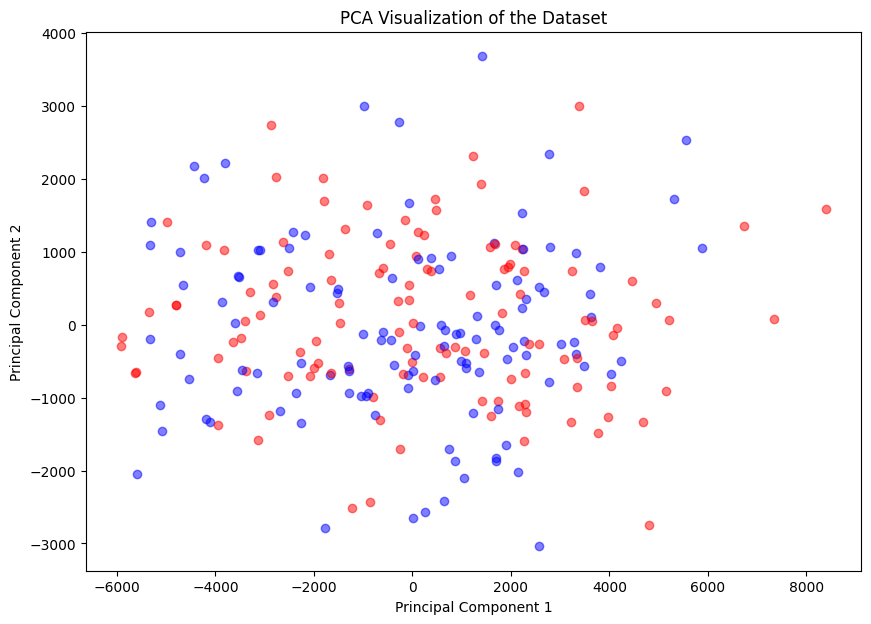

In [74]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

labels = np.array([1 if 'cat' in name else 0 for name in extracted_files])

# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
pca_transformed_data = pca.fit_transform(image_data)

colors = ['red' if label == 1 else 'blue' for label in labels]

plt.figure(figsize=(10, 7))
for i in range(len(colors)):
    plt.scatter(pca_transformed_data[i, 0], pca_transformed_data[i, 1], color=colors[i], alpha=0.5)
plt.title('PCA Visualization of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Total explained variance by the first two components 46%


**3B. Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some rock images to the visualization to better understand what features in the images are accounting for the majority of variance in the data (your visualization should look similar to the one after line 71 in this file https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynbLinks to an external site. but with images of rocks instead of MNIST digits). Repeat the process and create the same type of plots for t-SNE, LLE and MDS. [6 points]**

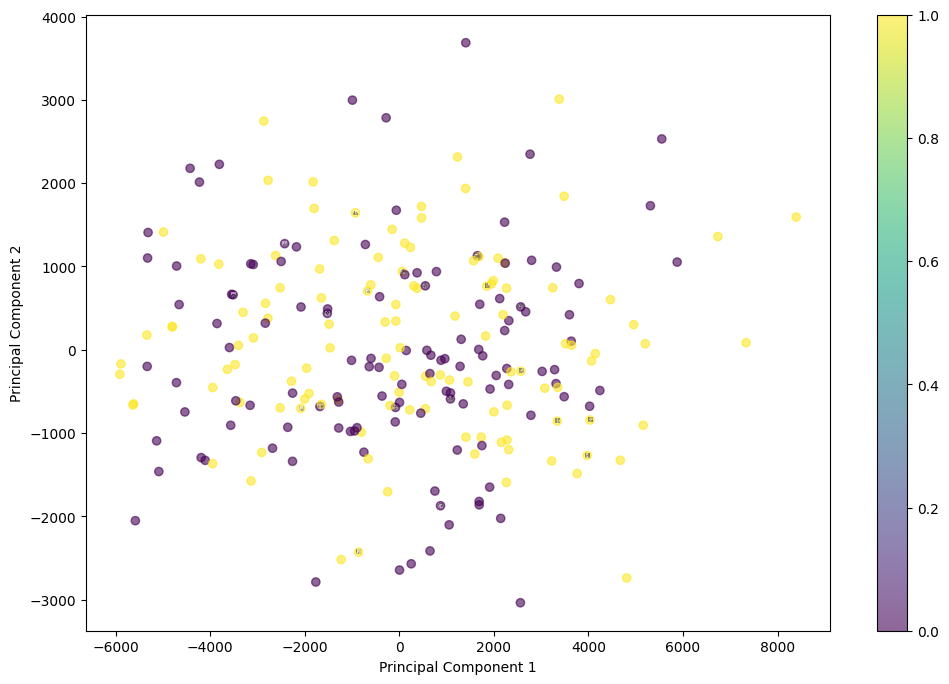

array([[ 90,  94,  99, ..., 194, 191, 194],
       [ 61,  52,  61, ...,  96,  92,  93],
       [106,  84,  50, ..., 191, 180, 164],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [231, 227, 220, ...,  79,  88, 112],
       [155, 151, 142, ..., 163, 160, 151]], dtype=uint8)

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(image_data)

def plot_images(X, labels, images, ax, image_scale=0.05, image_box_alpha=0.5):
    # Scatter plot
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)

    chosen_indices = np.linspace(0, len(images) - 1, 20).astype(int)
    for i in chosen_indices:
        image = images[i].reshape(64, 64)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(image, zoom=image_scale, cmap='gray', alpha=image_box_alpha),
            X[i], frameon=False)
        ax.add_artist(imagebox)

    return scatter

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))
scatter = plot_images(X_reduced, labels, image_data, ax)
plt.colorbar(scatter, ax=ax)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


image_data

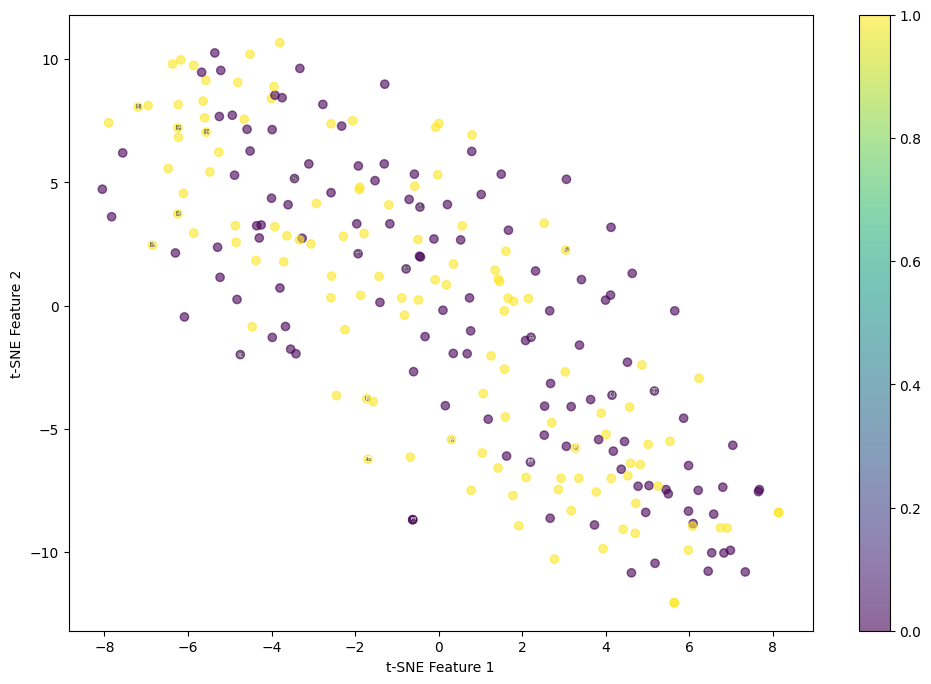

In [76]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dataset to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(image_data)

# Plotting the t-SNE-transformed dataset
fig, ax = plt.subplots(figsize=(12, 8))
scatter = plot_images(X_tsne, labels, image_data, ax)
plt.colorbar(scatter, ax=ax)
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


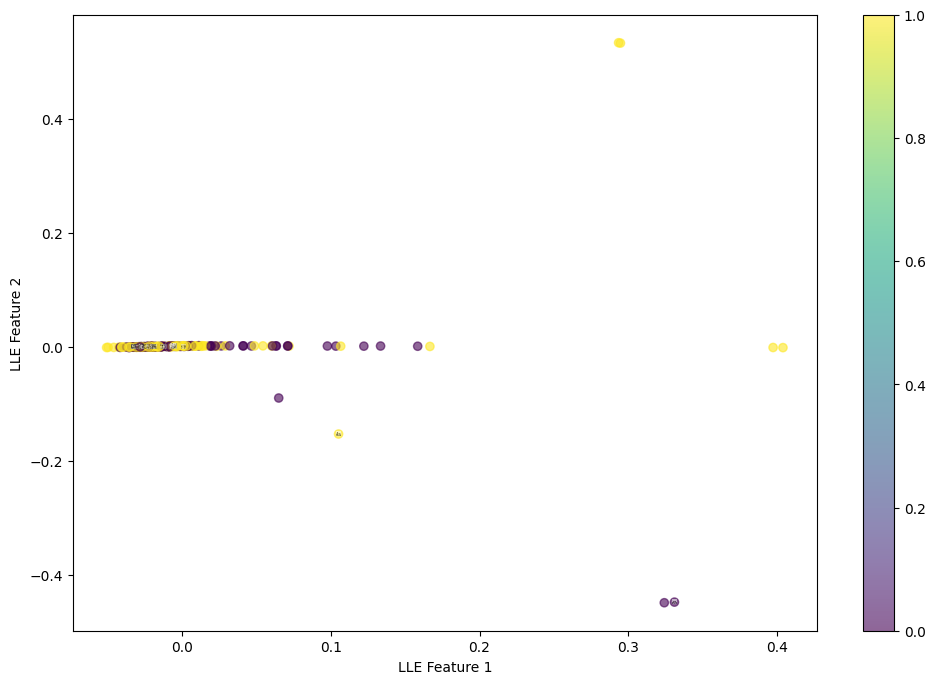

In [77]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply LLE to reduce the dataset to 2 dimensions
lle = LocallyLinearEmbedding(n_components=2, random_state=42, n_neighbors=10)
X_lle = lle.fit_transform(image_data)

# Plotting the LLE-transformed dataset
fig, ax = plt.subplots(figsize=(12, 8))
scatter = plot_images(X_lle, labels, image_data, ax)
plt.colorbar(scatter, ax=ax)
plt.xlabel('LLE Feature 1')
plt.ylabel('LLE Feature 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


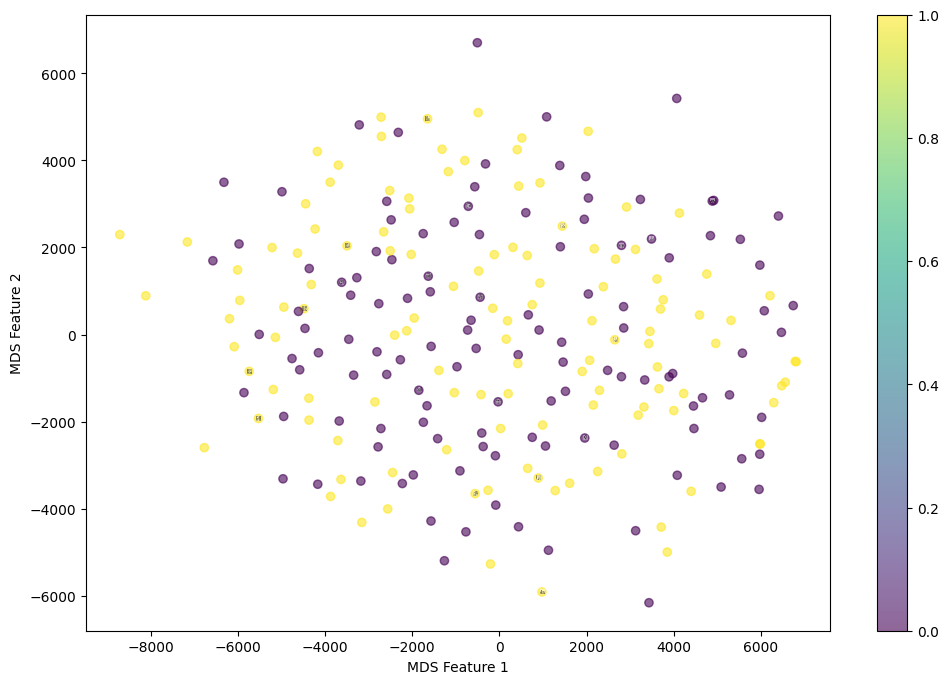

In [78]:
from sklearn.manifold import MDS

# Apply MDS to reduce the dataset to 2 dimensions
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(image_data)

# Plotting the MDS-transformed dataset
fig, ax = plt.subplots(figsize=(12, 8))
scatter = plot_images(X_mds, labels, image_data, ax)
plt.colorbar(scatter, ax=ax)
plt.xlabel('MDS Feature 1')
plt.ylabel('MDS Feature 2')
plt.show()


**3C. Discuss your observations.**

The t-SNE scatter plot shows a distribution of points with a moderate degree of clustering. The points do not form completely distinct clusters, indicating that while t-SNE is capturing local similarities among the data points, it may not be distinguishing well between the two categories if the color scale represents them.

The LLE plot displays a narrow, almost linear arrangement of data points with little dispersion along the LLE Feature 2 axis. This could imply that the local relationships in the data are such that many images are similar to their nearest neighbors, creating a tight-knit structure.

The MDS scatter plot reveals a broad spread of data points without any visible clusters, there is no clear distinction between categories based on the distances between the data points alone.

Out of the 3 dimensionality reduction plots used, we can conclude that LLE is the better choice.




**5.Cluster the 240 images using K-Means.**


**5A. You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class. [4 points]**

In [79]:
# Transform the image data using the already fitted PCA model (pca_90)
image_data_pca_90 = pca.transform(image_data)
image_data_pca_90.shape


(240, 2)

In [80]:
pca_90 = PCA(0.9)

image_data_pca_90_for_clustering = pca_90.fit_transform(image_data)

image_data_pca_90_for_clustering.shape


(240, 63)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

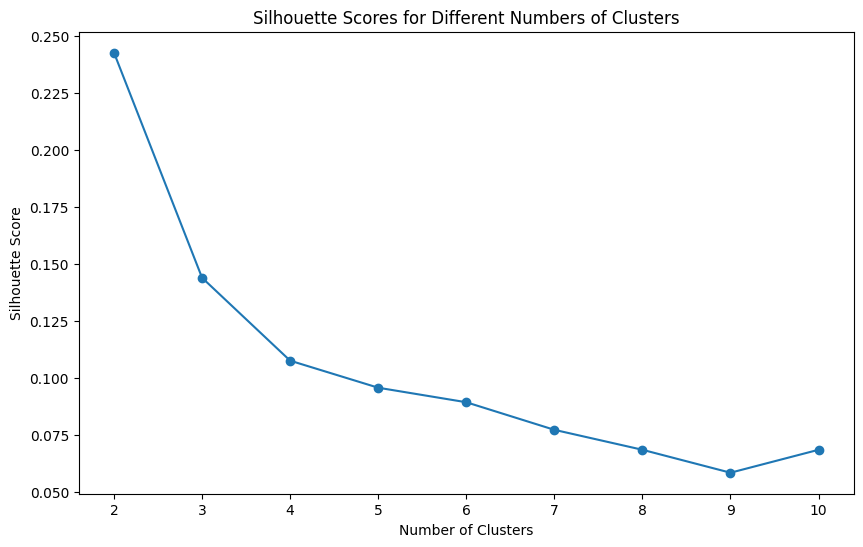

[0.24264670381376569,
 0.14385269162942554,
 0.10746159833985078,
 0.09558945095282531,
 0.08921328791929958,
 0.07710930339889668,
 0.06834523395970042,
 0.05827493147847548,
 0.0683452629334865]

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining a range of possible numbers of clusters to evaluate on
cluster_range = range(2, 11)

silhouette_scores = []

for n_clusters in cluster_range:
    # Applying K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(image_data_pca_90_for_clustering)

    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(image_data_transformed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

silhouette_scores


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

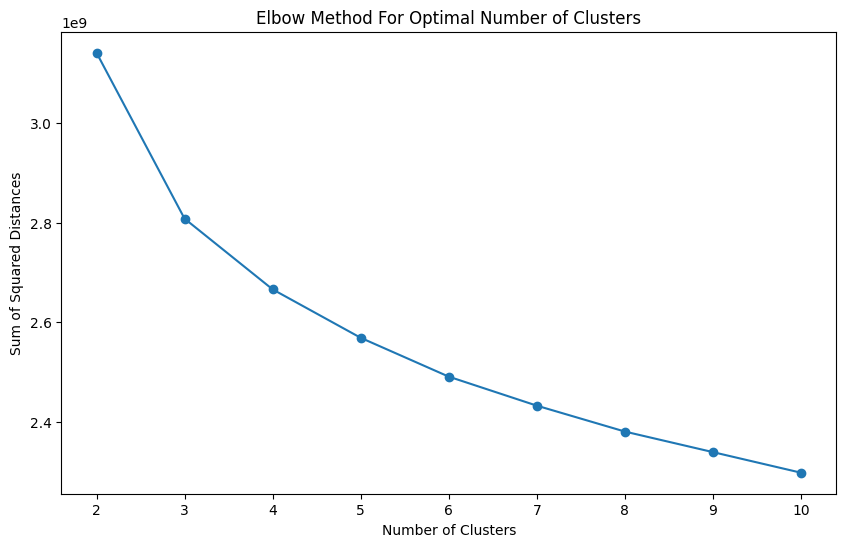

In [82]:
sum_of_squared_distances = []

for n_clusters in cluster_range:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans = kmeans.fit(image_data_transformed)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sum_of_squared_distances, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


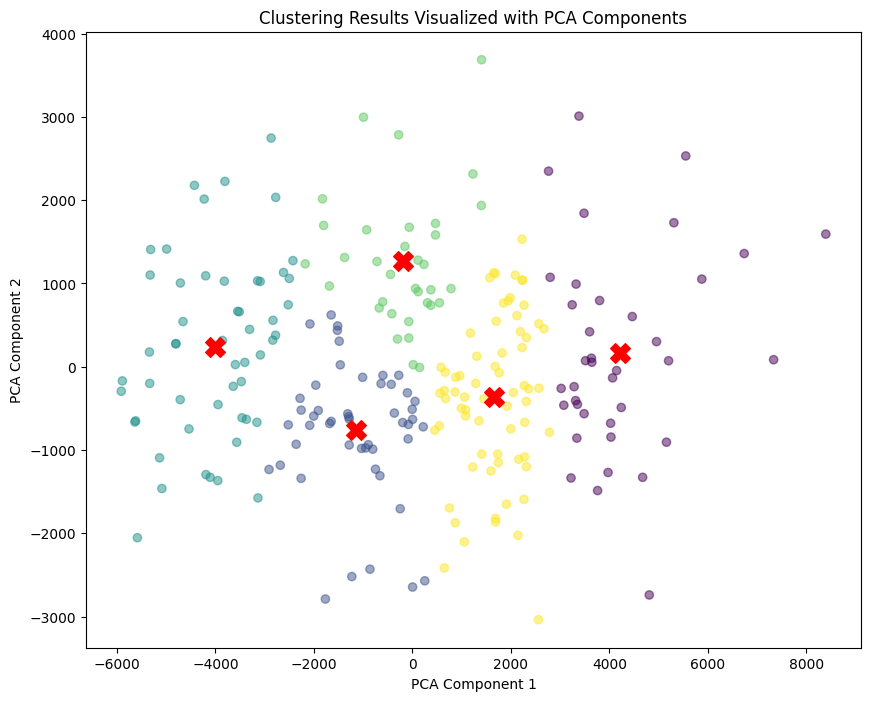

In [83]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

pca = PCA(n_components=2)
image_data_pca = pca.fit_transform(image_data)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(image_data_pca)

plt.figure(figsize=(10, 8))
plt.scatter(image_data_pca[:, 0], image_data_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)

# Plotting the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results Visualized with PCA Components')
plt.show()


We are reducing the dimensionality of our image_data to two principal components using PCA. This is done to allow for a 2D scatter plot visualization.
We then apply K-Means clustering to the PCA-reduced data with a specified number of clusters.

A visualization plot lets is see the clustering results by plotting the two principal components on the x and y axes, respectively, with data points colored based on their cluster assignment. Cluster centroids are plotted in red.

**5B. Set the number of clusters to 3 and report clustering accuracy. [4 points]**

In [84]:
# Apply K-Means Clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(image_data_transformed)
clusters_3[:10]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 1, 1, 0, 0, 2, 0, 2], dtype=int32)

In [85]:
from sklearn.metrics import adjusted_rand_score

true_labels = np.array([0 if 'cat' in filename else 1 for filename in extracted_files])

# Calculate the Adjusted Rand Index using K-Means labels and true labels
ari_score = adjusted_rand_score(true_labels, clusters_3)

print("Adjusted Rand Index (ARI):", ari_score)


Adjusted Rand Index (ARI): -0.0010904080323218912


Since clustering is an unsupervised learning technique, we can't directly measure accuracy as we would in supervised learning.

We can make use of the Adjusted Rand Index (ARI) or a similar measure that compares the similarity of two true labels with the clusters that we have determined.

I have set the number of clusters to 3 and applied K-Means clustering to the PCA-transformed data (while preserving at least 90% of the variance)

**6. Cluster the 360 images using EM.**

**6A. You can again reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class. [4 points]**

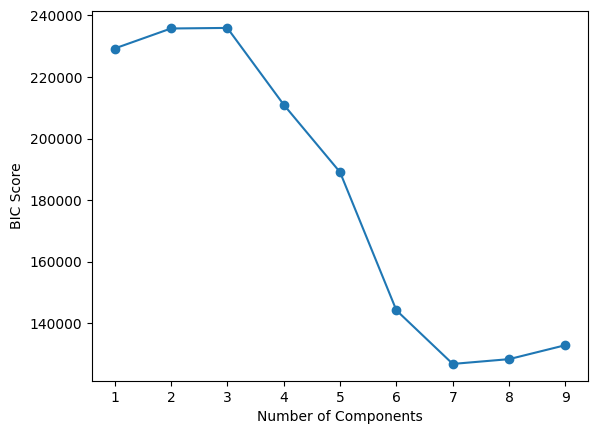

In [86]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
image_data_pca = pca.fit_transform(image_data)

# Use BIC to find the optimal number of clusters/components for GMM
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(image_data_pca)
          for n in n_components]
bic_scores = [m.bic(image_data_pca) for m in models]

plt.plot(n_components, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()


from the above visualisation we can determine the number of clusters to be 3

In [87]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm_clusters = gmm.fit_predict(image_data_pca)

gmm_clusters

array([2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1,
       0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0,
       0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2])

**6B. Set the number of clusters to 3 and report clustering accuracy. [4 points]**

we are determining the clustering accuracy using the Adjusted Rand Index since Expectation Maximisation (EM) is an unsupervised learning algorithm and hence we determine the clustering accuracy using the true labels and number of clusters that we have as fixed to be 3

In [88]:
# Cluster using GMM with the optimal number of clusters=3
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(image_data_pca)

# Predict cluster labels
cluster_labels = gmm.predict(image_data_pca)


In [89]:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(true_labels, gmm_clusters)
print("Adjusted Rand Index (ARI):", ari_score)


Adjusted Rand Index (ARI): -0.0033657923884591887


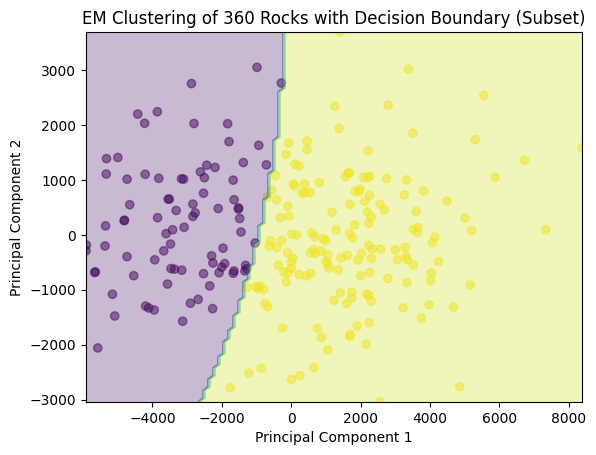

In [90]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

def read_and_convert_to_grayscale(file_path, target_size=(64, 64)):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)
    return img_resized.flatten()

folder_path = '/content/catsndogs_train'

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

X = [read_and_convert_to_grayscale(os.path.join(folder_path, img_file)) for img_file in image_files]
X = np.array(X)

labels = [filename[0] for filename in image_files]

subset_size = 1000
subset_indices = np.random.choice(range(len(X)), size=min(subset_size, len(X)), replace=False)
X_subset = X[subset_indices]
labels_subset = np.array(labels)[subset_indices]

# Apply PCA to reduce dimensionality to 2 for the subset
pca = PCA(n_components=2)
X_pca_subset = pca.fit_transform(X_subset)

em = GaussianMixture(n_components=2, random_state=42)
cluster_labels_subset = em.fit_predict(X_pca_subset)

# Plot the clustered points
plt.scatter(X_pca_subset[:, 0], X_pca_subset[:, 1], c=cluster_labels_subset, cmap='viridis', alpha=0.5)

# Plot decision boundary in segments
segment_size = 500
for i in range(0, len(X_pca_subset), segment_size):
    segment = X_pca_subset[i:i + segment_size]
    xx, yy = np.meshgrid(np.linspace(segment[:, 0].min(), segment[:, 0].max(), 100),
                         np.linspace(segment[:, 1].min(), segment[:, 1].max(), 100))

    Z = em.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title('EM Clustering of 360 Rocks with Decision Boundary (Subset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**6C. Use the model to generate 20 new rocks (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method).  [4 points]**

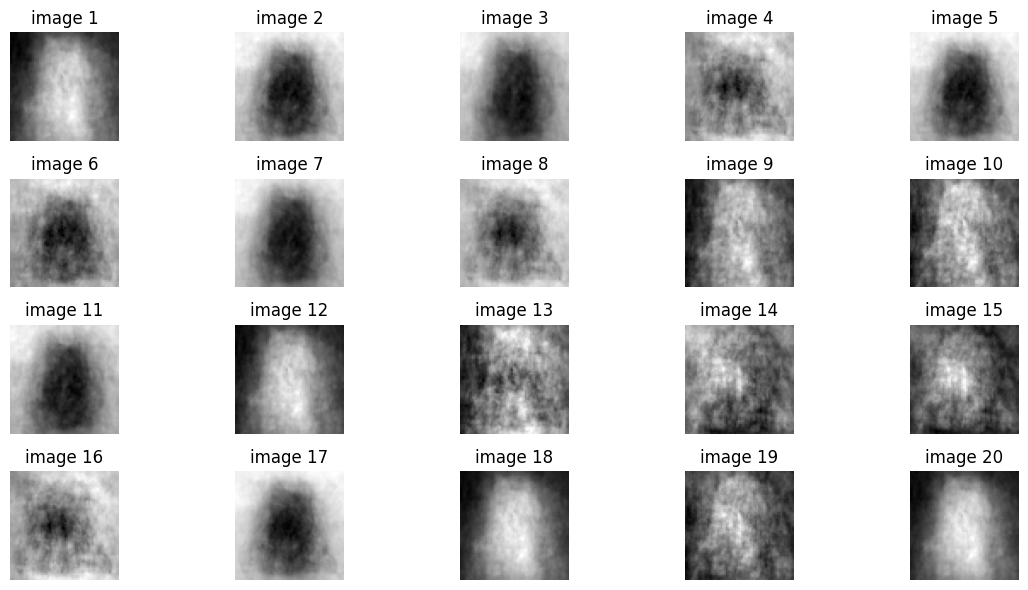

In [91]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca = PCA(n_components=109)
pca_result = pca.fit_transform(image_data)

bic_scores = []
for n_components in range(2, 11):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(image_data)

    # Apply Gaussian Mixture Model (EM algorithm)
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(pca_result)

    # Calculate BIC score
    bic_scores.append(gmm.bic(pca_result))


# Generate 20 new images using the trained GMM model
new_rocks_pca = gmm.sample(n_samples=20)[0]

# Transform generated images back to the original space using inverse_transform
new_rocks = pca.inverse_transform(new_rocks_pca)

image_shape = (64, 64)
new_rocks_images = new_rocks.reshape(-1, *image_shape)

# Visualize the generated images
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(new_rocks_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f'image {i+1}')

plt.tight_layout()
plt.show()

**7. Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify on 360 rock images using rock name as the label - the category is indicated by the first letter in the filename (I, M and S). Use images from '120 Rocks' folder as your validation data. Choose the number of neurons you find appropriate and efficient (so you have enough time to run it), but make the last layer before the softmax should consist of 8 neurons. The hidden layers should have ReLU activation function. Train the network for multiple epochs until it converges (if the process is too slow, tweak the learning rate and consider simplifying your network). We will not deduct points based on the simplicity of your network, but we expect you to have performance that is above chance performance that could be obtained with an untrained network - in other words, we expect to see train and validation loss decrease and accuracy increase throughout the training. We recommend using Colab (the free version should be totally fine), but make sure to run it with a GPU to speed up the training - to add a GPU on Colab go to Edit->Notebook settings).**##

**7A. Report the training time (use code to do this). [1 point]**

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Resizing each image to 64x64 and grayscale
input_shape = (64, 64, 1)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(8, activation='relu'),  # The layer before the softmax with 8 neurons
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [93]:

import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
from tensorflow.keras.callbacks import EarlyStopping


In [94]:
# Function to load and preprocess images
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = load_img(os.path.join(folder, filename), target_size=(64, 64))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(filename[0])
    return np.array(images), np.array(labels)

In [95]:
# Load and preprocess training images
X, y = load_images('catsndogs_train')

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y_encoded, num_classes=8)  # assuming 8 classes

# Split the data for training and testing
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [96]:
img_width,img_height = 64,64

In [97]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time

input_shape = (img_width, img_height, 3)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.005)),  # L2 regularization
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.006)),  # L2 regularization
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(8, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Displaying the model summary
model.summary()

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, mode='min', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
callbacks_list = [early_stopping, reduce_lr]
# Train the model and measure the time
start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)
end_time = time.time()

# Calculate training time using the below formula
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                      

Training time as determined from the code is 11.36 seconds

In [98]:
from zipfile import ZipFile
import os

zip_file_path = '/content/catsndogs_test.zip'
extraction_directory = '/content/catsndogs_test'

os.makedirs(extraction_directory, exist_ok=True)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
extracted_files[:5], len(extracted_files)


(['dog_462.jpg', 'cat_422.jpg', 'dog_354.jpg', 'dog_536.jpg', 'cat_96.jpg'],
 140)

In [99]:
X_val, y_val = load_images('catsndogs_test')
y_val_encoded = label_encoder.transform(y_val)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=8)


**7b. Plot training and validation loss and accuracy as a function of training epochs. [13 points]**

5/5 [==============================] - 0s 4ms/step - loss: 4.2873 - accuracy: 0.5286
Validation Accuracy: 52.86%


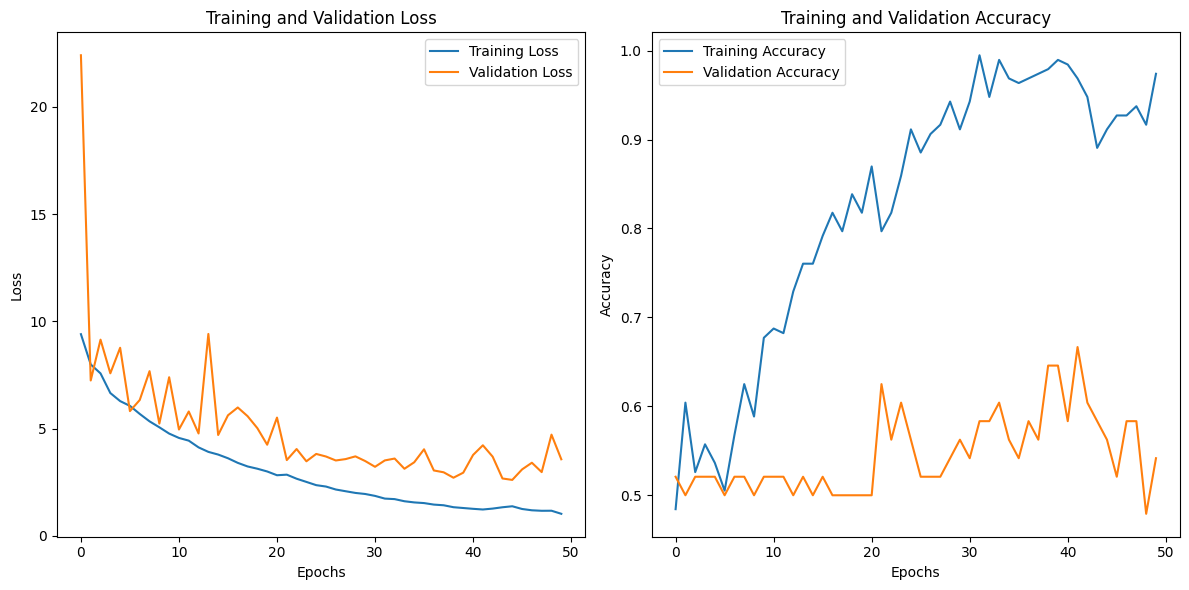

In [100]:
# Evaluate the model on the validation set
evaluation = model.evaluate(X_val, y_val_one_hot)
accuracy = evaluation[1]
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**7C. How many parameters does the network have? How many of those parameters are bias parameters? [1 points]**

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                      